In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
oyo_fire_df = pd.read_excel("./data/forest_fire_oyo.xlsx")

In [3]:
oyo_fire_df.head()

,Region,Latitude,Longitude,Date,FFMC,DMC,DC,Temp (°C),RH (%),Wind (km/h),Rain (mm),Area (ha),Fire Image Path
0,Oyo,8.999875,3.637067,2022-05-11,83.359560,102.385488,653.015202,21.852474,85,2.455618,9.280898,5.407701,images/oyo_fire_00964.jpg
1,Oyo,8.999762,4.512694,2021-12-14,90.973945,34.979638,592.345153,21.133838,27,3.698386,19.947904,5.581177,images/oyo_fire_05974.jpg
2,Oyo,8.999672,3.388957,2020-09-26,73.857223,31.397917,752.505474,33.862092,38,5.669234,13.126487,0.355110,images/oyo_fire_08150.jpg
3,Oyo,8.999399,3.776015,2019-12-12,85.108694,140.636298,736.836048,32.569924,45,13.631465,7.722185,0.179279,images/oyo_fire_03585.jpg
4,Oyo,8.999362,3.891512,2021-05-18,78.390798,39.859990,321.453711,20.085153,43,13.429195,12.100642,0.015861,images/oyo_fire_00839.jpg


In [4]:
oyo_fire_df.fillna(0, inplace=True) 

In [5]:
oyo_fire_df['Fire'] = (oyo_fire_df['Area (ha)'] > 0.5).astype(int)

In [6]:
oyo_fire_df.head()

,Region,Latitude,Longitude,Date,FFMC,DMC,DC,Temp (°C),RH (%),Wind (km/h),Rain (mm),Area (ha),Fire Image Path,Fire
0,Oyo,8.999875,3.637067,2022-05-11,83.359560,102.385488,653.015202,21.852474,85,2.455618,9.280898,5.407701,images/oyo_fire_00964.jpg,1
1,Oyo,8.999762,4.512694,2021-12-14,90.973945,34.979638,592.345153,21.133838,27,3.698386,19.947904,5.581177,images/oyo_fire_05974.jpg,1
2,Oyo,8.999672,3.388957,2020-09-26,73.857223,31.397917,752.505474,33.862092,38,5.669234,13.126487,0.355110,images/oyo_fire_08150.jpg,0
3,Oyo,8.999399,3.776015,2019-12-12,85.108694,140.636298,736.836048,32.569924,45,13.631465,7.722185,0.179279,images/oyo_fire_03585.jpg,0
4,Oyo,8.999362,3.891512,2021-05-18,78.390798,39.859990,321.453711,20.085153,43,13.429195,12.100642,0.015861,images/oyo_fire_00839.jpg,0


In [7]:
oyo_fire_df.isnull().sum()

Region             0
Latitude           0
Longitude          0
Date               0
FFMC               0
DMC                0
DC                 0
Temp (°C)          0
RH (%)             0
Wind (km/h)        0
Rain (mm)          0
Area (ha)          0
Fire Image Path    0
Fire               0
dtype: int64

In [8]:
# Check for duplicates
oyo_fire_df.duplicated().sum()

np.int64(0)

In [9]:
oyo_fire_df.describe()

,Latitude,Longitude,Date,FFMC,DMC,DC,Temp (°C),RH (%),Wind (km/h),Rain (mm),Area (ha),Fire
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.000088,3.996536,2022-06-12 21:34:16.319999744,82.868847,90.184081,549.146914,29.996292,54.694200,7.710580,10.106310,1.980175,0.776400
min,7.000293,3.000420,2019-12-05 00:00:00,70.010284,30.019851,300.075813,20.001602,20.000000,0.500160,0.003368,0.000074,0.000000
25%,7.502674,3.496443,2021-03-04 00:00:00,76.332507,60.552273,425.103554,24.978892,37.000000,4.102175,5.077907,0.575422,1.000000
50%,7.989945,3.994563,2022-06-19 12:00:00,82.847014,90.314295,549.323626,30.011097,55.000000,7.709198,10.223832,1.360118,1.000000
75%,8.503277,4.496544,2023-09-15 06:00:00,89.412293,120.094480,671.075883,34.970458,72.000000,11.296671,15.101452,2.730624,1.000000
max,8.999875,4.999928,2024-12-04 00:00:00,95.998992,149.993929,799.941773,39.998770,89.000000,14.998274,19.999324,18.676006,1.000000
std,0.578727,0.575972,NaN,7.522285,34.429860,143.584618,5.768176,20.154015,4.177627,5.764159,2.014431,0.416678


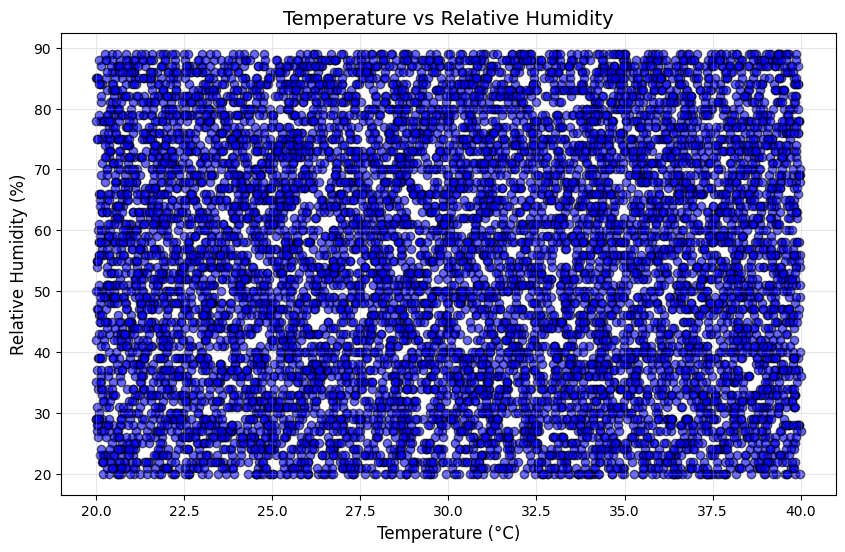

In [10]:
# Ploting Temperature against Relative Humidity (RH)

plt.figure(figsize=(10, 6))
plt.scatter(oyo_fire_df["Temp (°C)"], oyo_fire_df["RH (%)"], color="blue", alpha=0.6, edgecolor="k")
plt.title("Temperature vs Relative Humidity", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Relative Humidity (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

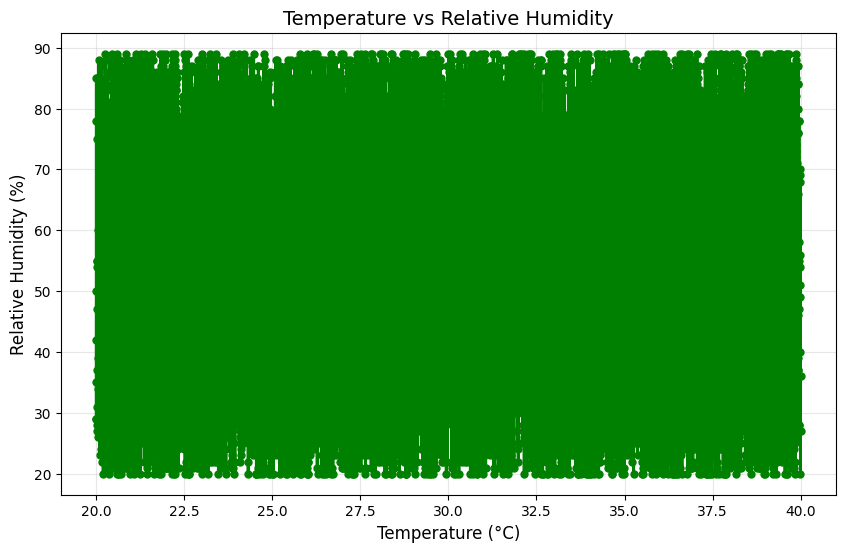

In [11]:
# Sort the data by Temperature for a better line chart representation
df = oyo_fire_df.sort_values(by="Temp (°C)")

# Plot Temperature vs Relative Humidity
plt.figure(figsize=(10, 6))
plt.plot(df["Temp (°C)"], df["RH (%)"], color="green", marker="o", linestyle="-", linewidth=2, markersize=5)
plt.title("Temperature vs Relative Humidity", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Relative Humidity (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Outliers


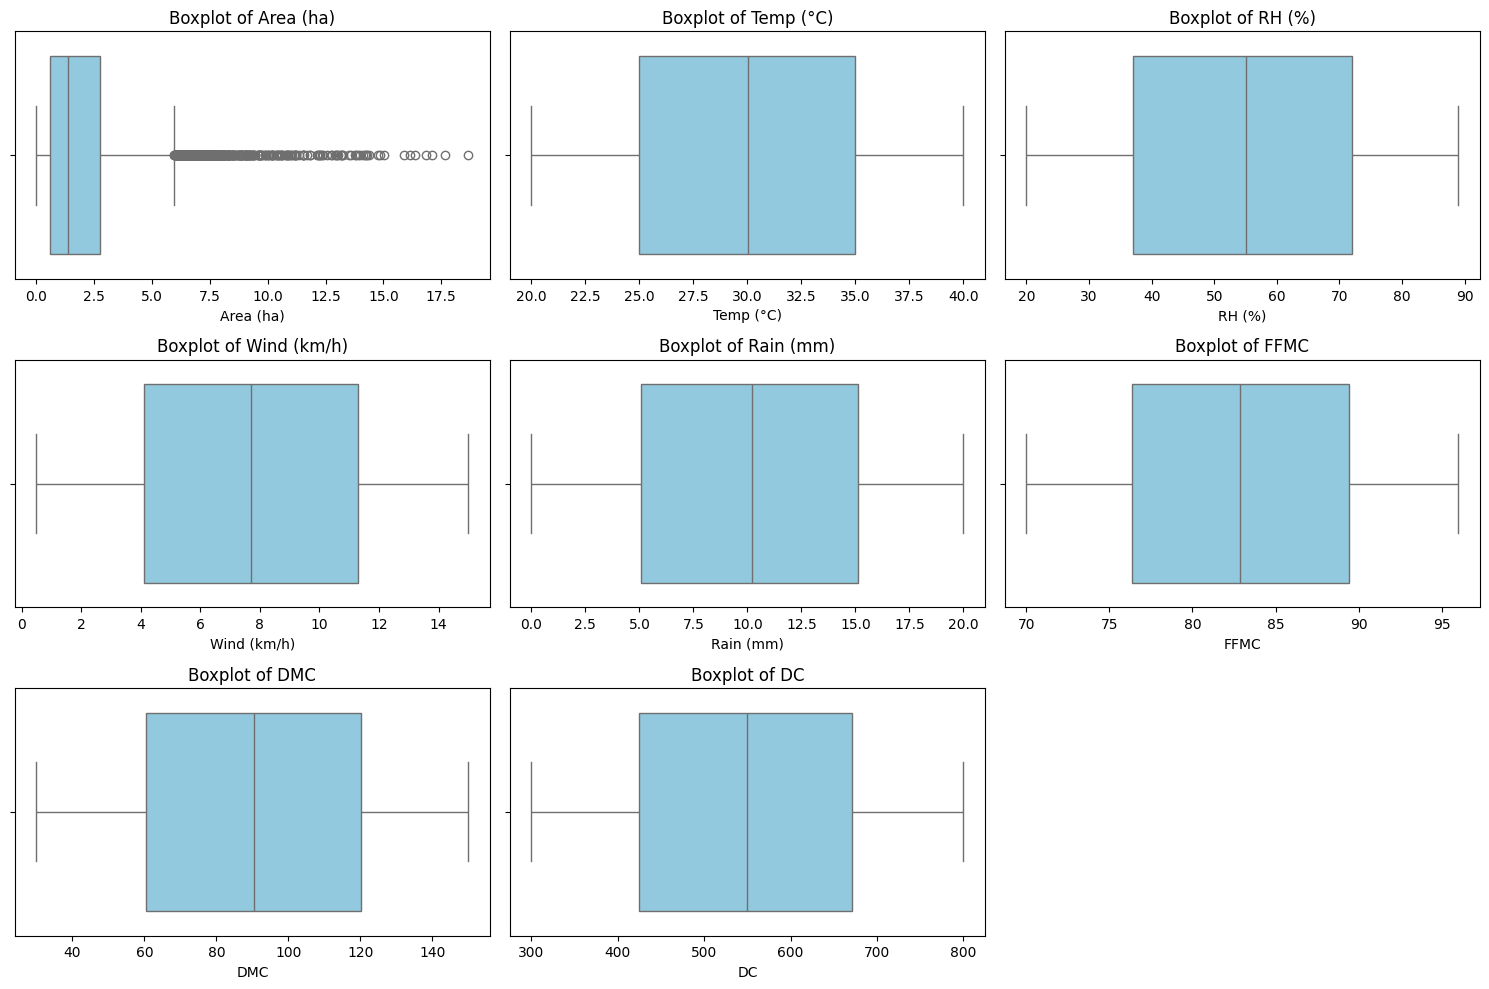

In [12]:
# List of numerical columns to check for outliers
numerical_cols = ['Area (ha)', 'Temp (°C)', 'RH (%)', 'Wind (km/h)', 'Rain (mm)', 'FFMC', 'DMC', 'DC']

# Boxplot to visualize outliers for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=oyo_fire_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [13]:
# Using Interquartile Range (IQR) to remove rows with extreme values
Q1 = oyo_fire_df['Area (ha)'].quantile(0.25)
Q3 = oyo_fire_df['Area (ha)'].quantile(0.75)
IQR = Q3 - Q1
oyo_fire_df = oyo_fire_df[~((oyo_fire_df['Area (ha)'] < (Q1 - 1.5 * IQR)) | (oyo_fire_df['Area (ha)'] > (Q3 + 1.5 * IQR)))]

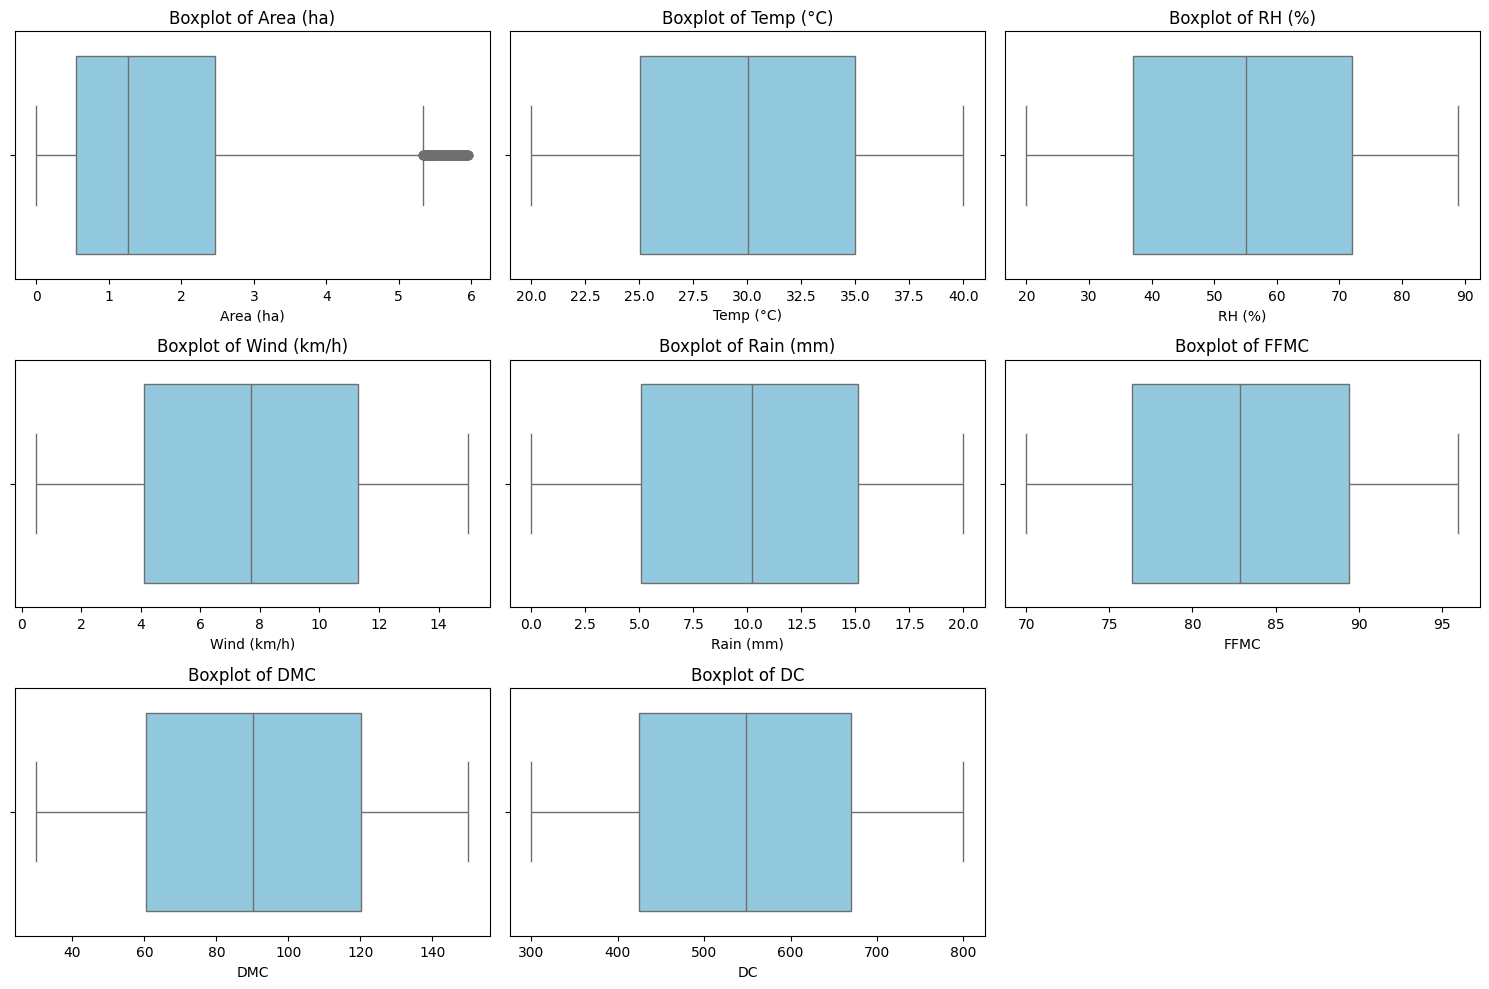

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=oyo_fire_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

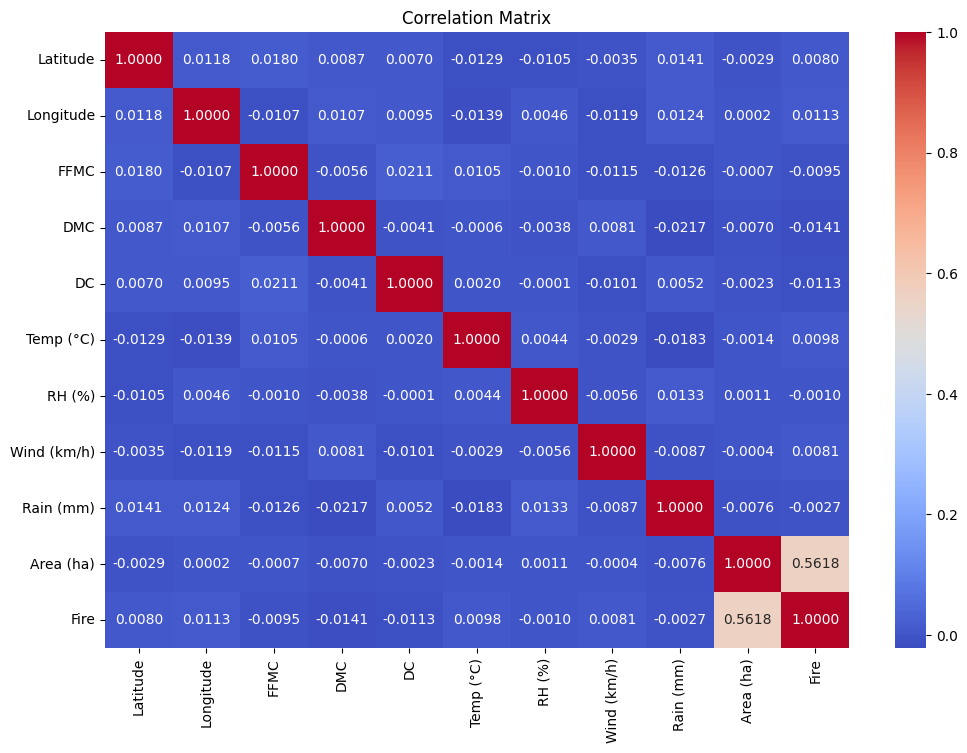

In [15]:
numeric_df = oyo_fire_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.show()

## Classification and Regression

In [16]:
X = oyo_fire_df[['Temp (°C)', 'RH (%)', 'Wind (km/h)', 'Rain (mm)', 'FFMC', 'DMC', 'DC']]
y = oyo_fire_df['Fire'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
### 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.7680168332456602
              precision    recall  f1-score   support

           0       0.50      0.01      0.03       441
           1       0.77      1.00      0.87      1460

    accuracy                           0.77      1901
   macro avg       0.63      0.50      0.45      1901
weighted avg       0.71      0.77      0.67      1901



In [19]:
### 2. Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.7680168332456602
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.77      1.00      0.87      1460

    accuracy                           0.77      1901
   macro avg       0.38      0.50      0.43      1901
weighted avg       0.59      0.77      0.67      1901



/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
### 3. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.6396633350867964
              precision    recall  f1-score   support

           0       0.26      0.29      0.28       441
           1       0.78      0.74      0.76      1460

    accuracy                           0.64      1901
   macro avg       0.52      0.52      0.52      1901
weighted avg       0.66      0.64      0.65      1901



In [21]:
### 4. SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.7680168332456602
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.77      1.00      0.87      1460

    accuracy                           0.77      1901
   macro avg       0.38      0.50      0.43      1901
weighted avg       0.59      0.77      0.67      1901



/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Create base models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=500)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(kernel='linear')

# Create a stacking model using the base models
# The final estimator (meta-model) can be a Logistic Regression
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), 
                ('lr', lr_model), 
                ('dt', dt_model), 
                ('svm', svm_model)], 
    final_estimator=LogisticRegression()
)

# Fit the stacking model to the training data
stacking_model.fit(X_train, y_train)

# Predict with the stacking model
stacking_preds = stacking_model.predict(X_test)

# Evaluate the model
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_preds))
print(classification_report(y_test, stacking_preds))

Stacking Classifier Accuracy: 0.7680168332456602
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.77      1.00      0.87      1460

    accuracy                           0.77      1901
   macro avg       0.38      0.50      0.43      1901
weighted avg       0.59      0.77      0.67      1901



/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oradev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
